# <span style="color:rgb(160,0,86)">Schätzverfahren</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie kennen den **zentralen Grenzwertsatz** und können die passende **Normalverteilung** in die Stichprobenverteilung zeichnen. 
- Sie kennen Eigenschaften von **Schätzverfahren**.
- Sie können **Punktschätzer** von **Interallschätzern** unterscheiden.  
- Sie können für wichtige Parameter diese **Schätzer berechnen**.  

***

### <span style="color:rgb(160,0,86)">Was ist der zentrale Grenzwertsatz?</span>

In der letzten Serie haben wir **Mittelwerte aus 1000 Zufallsstichproben** berechnet und die empirische Verteilung gezeichnet:
- Die Verteilung hat eine **Glockenform**.
- Die Verteilung **wird für grössere Stichproben schmaler**.

Der deutsche Mathematiker ***Carl Friedrich Gauss*** (1777-1855) hat die Berechung für diese **Normalverteilung** entdeckt. Der alte 10 DM-Schein (seit 1991 im Umlauf) wurde Gauss gewidmet und seine ***Glockenkurve mit Formel*** abgebildet:  

<center>
<img src="Bilder/Gauss.png" width="55%" />
</center>

Eine **normalverteile Zufallsvariable** $\,\pmb{X}\,$ gibt Werte aus $\mathbb{R}$ zurück. Ihre Dichte wird gemäss folgender Formel berechnet: $$\text{Dichte}(x)=\texttt{X.pdf(x)} = \frac{1}{\sigma\cdot\sqrt{2\pi}}\cdot e^{-\frac{(x-\mu)^2}{2\,\cdot\,\sigma^2}}$$
Die Parameter <tt>loc</tt> und <tt>scale</tt> in der Funktion **norm( )** aus dem Modul **SciPy** bestimmen die Lage und Form der Kurve: 
- <tt>loc</tt> ist der **Erwartungswert** $\,\pmb{\mu}\,$ der Zufallsvariable $\,\pmb{X}\,$. 
- <tt>scale</tt> ist die **Standardabweichung** $\,\pmb{\sigma}\,$ der Zufallsvariable $\,\pmb{X}\,$.

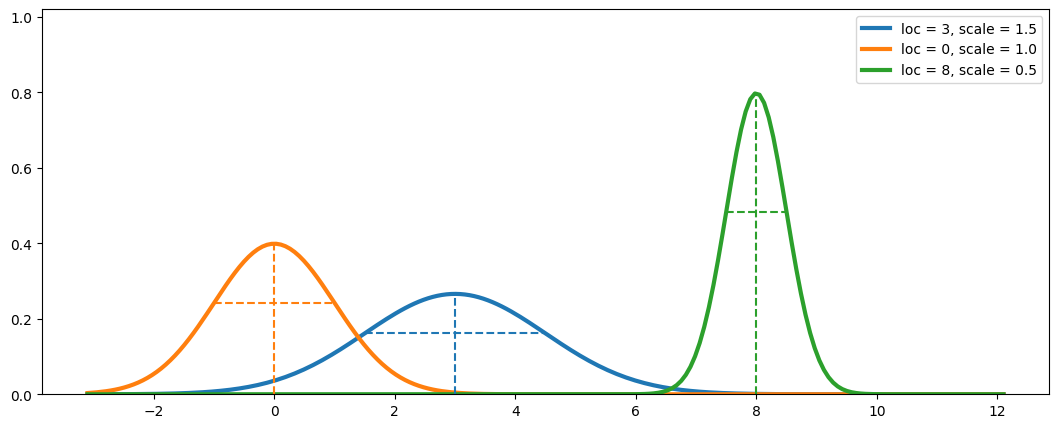

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Zufallsvariable definieren
X_1 = norm(loc=3,scale=1.5)
X_2 = norm(loc=0,scale=1)
X_3 = norm(loc=8,scale=0.5)

# Probability Density Function
x = np.linspace(-3.1,12.1,200) # x-Koordinaten
X_pdf_1 = X_1.pdf(x)           # y-Koordinaten
X_pdf_2 = X_2.pdf(x)           # y-Koordinaten
X_pdf_3 = X_3.pdf(x)           # y-Koordinaten

fig = plt.figure(figsize=(13,5))

# Zugriff auf Standardfarben (Tableau 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

axi = fig.add_subplot(1,1,1)
axi.plot(x,X_pdf_1,lw=3)
axi.plot(x,X_pdf_2,lw=3)
axi.plot(x,X_pdf_3,lw=3)
axi.set_ylim(0,1.02)
axi.legend(["loc = 3, scale = 1.5",
            "loc = 0, scale = 1.0",
            "loc = 8, scale = 0.5"])

# Linien für die Erwartungswerte 
axi.vlines(X_1.mean(),0,X_1.pdf(X_1.mean()),
           color=colors[0],linestyle="dashed")
axi.vlines(X_2.mean(),0,X_2.pdf(X_2.mean()),
           color=colors[1],linestyle="dashed")
axi.vlines(X_3.mean(),0,X_3.pdf(X_3.mean()),
           color=colors[2],linestyle="dashed")

# Linien für die Standardabweichungen 
axi.hlines(X_1.pdf(X_1.mean()-X_1.std()),
           X_1.mean()-X_1.std(),X_1.mean()+X_1.std(),
           color=colors[0],linestyle="dashed")
axi.hlines(X_2.pdf(X_2.mean()-X_2.std()),
           X_2.mean()-X_2.std(),X_2.mean()+X_2.std(),
           color=colors[1],linestyle="dashed")
axi.hlines(X_3.pdf(X_3.mean()-X_3.std()),
           X_3.mean()-X_3.std(),X_3.mean()+X_3.std(),
           color=colors[2],linestyle="dashed")

plt.show()

Der finnische Mathematiker ***Jarl Waldemar Lindeberg*** (1876–1932) und der französischen Statistiker ***Paul Lévy*** (1886–1971) haben eine  **wichtige Eigenschaft von Stichprobenmittelwerten** bewiesen.

<center>
<img src="Bilder/LevyLindeberg.png" width="60%" />
</center>

Diese folgenden Eigenschaften, zusammengefasst im sogenannten <span style="color:rgb(160,0,86)">***Zentralen Grenzwertsatz***</span>, können in der Mathematik streng und exakt bewiesen werden. 

- Die Verteilung von Stichprobenmittelwerten aus mehreren Zufallsstichproben ähnelt immer genauer der Normalverteilung (Glockenkurve von Gauss), wenn die Grösse $n$ der Zufallsstichproben gross wird: $$\left.\begin{array}{c}\textbf{Verteilung von Stichprobenmittelwerten} \\ \textbf{aus grossen Zufallsstichproben}\end{array}\;\,\right\} \;\sim\;\, \textbf{Normalverteilung}$$ Dabei spielt die Verteilung in der Grundgesamtheit keine Rolle, diese muss selbst nicht normalverteilt sein.
- Die Stichprobenmittelwerte liegen um die gleiche Lage wie der Mittelwert in der Grundgesamtheit: $$\left.\begin{array}{c}\textbf{mittlere Lage der}\\ \textbf{Stichprobenmittelwerte}\end{array}\;\,\right\} \;\,=\,\;\left\{\;\,\begin{array}{c}\textbf{mittlere Lage der}\\ \textbf{Daten in der Grundgesamtheit}\end{array}\right.$$ 
- Mit zunehmender Grösse $n$ der Zufallsstichproben nimmt die Streuung der Stichprobenmittelwerte ab: $$\left.\begin{array}{c}\textbf{Streuung der}\\ \textbf{Stichprobenmittelwerte}\end{array}\;\,\right\} \;\,=\,\; \frac{\textbf{Streuung in der Grundgesamtheit}}{\sqrt{\textbf{Grösse der Zufallsstichproben}}}$$

Betrachen wir noch einmal die ***Jahreseinkommen von Kreditantragstellern*** bei **Lending Club** und zeihen **Stichproben** der Grösse $\,\pmb{n=25}\,$ und $\,\pmb{n=400}\,$:

In [3]:
import numpy as np
import pandas as pd

income = pd.read_csv("/Users/muellefa/repos/ASTAT/SW06/Daten/loans_income.csv")

stichprobenmittelwerte_25 = [np.random.choice(income["x"],
                                             size=25,
                                             replace=False).mean()
                            for _ in range(1000)]

stichprobenmittelwerte_400 = [np.random.choice(income["x"],
                                              size=400,
                                              replace=False).mean() 
                            for _ in range(1000)]

- Nach dem ***zenralen Grenzwertsatz*** sollten die **mittlere Lage der Stichprobenmittelwerte** mit der **mittleren Lage der Grundgesamtheit** übereinstimmen: 

In [4]:
mittelwert_G = income["x"].mean()

mittelwert_25 = np.array(stichprobenmittelwerte_25).mean()
mittelwert_400 = np.array(stichprobenmittelwerte_400).mean()

print("Mittlerer Lohn in der Grundgesamtheit                :", 
      round(mittelwert_G,2))
print("Mittlere Lage der Stichprobenmittelwerte mit n = 25  :", 
      round(mittelwert_25,2))
print("Mittlere Lage der Stichprobenmittelwerte mit n = 400 :", 
      round(mittelwert_400,2))

Mittlerer Lohn in der Grundgesamtheit                : 68760.52
Mittlere Lage der Stichprobenmittelwerte mit n = 25  : 68758.39
Mittlere Lage der Stichprobenmittelwerte mit n = 400 : 68780.87


- Nach dem ***zenralen Grenzwertsatz*** sollten die **Streuung der Stichprobenmittelwerte** mit der **Streuung der Grundgesamtheit dividiert durch die Wurzel aus der Stichprobengrösse** übereinstimmen: 

In [5]:
std_G = income["x"].std(ddof=0)

std_25 = np.array(stichprobenmittelwerte_25).std(ddof=0)
std_400 = np.array(stichprobenmittelwerte_400).std(ddof=0)

print("Streuung der Stichprobenmittelwerte mit n = 25      :", 
      round(std_25,2))
print("Streuung in der Grundgesamtheit durch Wurzel von 25 :", 
      round(std_G/np.sqrt(25),2))
print("Streuung der Stichprobenmittelwerte mit n = 400      :", 
      round(std_400,2))
print("Streuung in der Grundgesamtheit durch Wurzel von 400 :", 
      round(std_G/np.sqrt(400),2))

Streuung der Stichprobenmittelwerte mit n = 25      : 6659.75
Streuung in der Grundgesamtheit durch Wurzel von 25 : 6574.34
Streuung der Stichprobenmittelwerte mit n = 400      : 1650.83
Streuung in der Grundgesamtheit durch Wurzel von 400 : 1643.59


### <span style="color:rgb(160,0,86)">Was sind Schätzverfahren?</span>

Die **Schätztheorie** ist ein Teilgebiet der Statistik. Mit mathematischen Verfahren sollen *unbekannte Verteilungsparameter* (mittlere Lage, Streuung, etc.) einer Grundgesamtheit auf Basis von Zufallsstichproben *geschätzt werden*. 

<span style="color:rgb(160,0,86)">***Bemerkung:***</span> 
- Die **Kennzahlen in der Grundgesamtheit** werden oft mit ***griechischen Buchstaben*** bezeichnet.
- Als **Bezeichung für die geschätzen Werte** brauchen wir oft die gleichen Symbole, aber mit einem ***Hausdach*** $\;\hat{ }\;$ über dem Symbol! 

Es wird zwischen **Punktschätzugen** und **Intervallschätzungen** unterschieden.

<span style="color:rgb(160,0,86)">***Punktschätzer:***</span> Ein Punktschätzer gibt **einen einzelnen Wert** als Schätzung für einen unbekannten Parameter an.

- *Beispiel:* Der **Mittelwert** $\pmb{\bar{x}}$ einer Stichprobe als Schätzung $\pmb{\hat{\mu}}$ für den wahren **Mittelwert** $\pmb{\mu}$ der Grundgesamtheit. Die **relative Häufigkeit** $\pmb{h(\;)}$ in einer Stichprobe als Schätzung $\pmb{\hat{\pi}}$ für die tatsächliche **Häfigkeit** $\pmb{\pi}$ in der Grundgesamtheit.
- *Vorteil:* ***Einfach und direkt interpretierbar.***
- *Nachteil:* ***Enthält keine Information über die Unsicherheit der Schätzung.***

Ein Punktschätzer ist wie eine einzelne Zahl auf einer Zielscheibe – er ***kann genau treffen*** oder ***danebenliegen***.


<span style="color:rgb(160,0,86)">***Intervallschätzer:***</span> Ein Intervallschätzer gibt **ein Intervall** an, in dem der wahre Parameter mit einer bestimmten Wahrscheinlichkeit liegt.

- *Beispiel:* Ein **95%-Konfidenzintervall** $\pmb{[\bar{x}_{\text{min}},\bar{x}_{\text{max}}]}$ für den Mittelwert gibt an, in welchem Bereich der wahre Mittelwert $\pmb{\mu}$ der Grundgesamtheit mit einer Wahrscheinlichkeit von 95% liegt.
- *Vorteil:* ***Enthält Informationen über die Unsicherheit der Schätzung.***
- *Nachteil:* ***Komplexer als ein einzelner Punktwert.***

Ein Intervallschätzer ist wie ein Zielfernrohr, das eine gewisse Streuung zulässt – es gibt ***nicht nur eine Zahl***, sondern ***einen Bereich möglicher Werte*** an.

### <span style="color:rgb(160,0,86)">Wie werden Punktschätzer festgelet?</span>

Häufig werden Punktschätzer mit einer der folgenden Methoden bestimmt.

<span style="color:rgb(160,0,86)">***Kleinste-Quadrate-Schätzung LSE:***</span>

Man macht keine Annahmen über die Verteilung in der Grundgesamtheit und zieht eine Zufallsstichprobe $x_1,x_2,\ldots,x_n$. 

- <span style="color:rgb(160,0,86)">***Ziel:***</span> Die **Summe der quadrierten Fehler** $\mathsf{SSE}$ (**S**um of **S**quared **E**rrors) zwischen den beobachteten Werten und dem vorhergesagten Wert werden minimiert. <br> Der **Schätzer** $\pmb{\hat{\mu}}$ für den Mittelwert $\pmb{\mu}$ einer Grundgesamtheit hat zum Beispiel die Eigenschaft, dass für die gegebene Stichprobe die Zahl $$\mathsf{SSE}(\pmb{\hat{\mu}})=(x_1-\pmb{\hat{\mu}})^2 + (x_2-\pmb{\hat{\mu}})^2 + (x_3-\pmb{\hat{\mu}})^2 + \cdots + (x_n-\pmb{\hat{\mu}})^2$$ minimal ist. Mit den Methoden der Analysis folgt, dass $$\pmb{\hat{\mu}} = \frac{1}{n}(x_1 + x_2 + x_3 + \cdots + x_n)$$ gerechnet werden muss. Der Mittelwert $\pmb{\mu}$ wird also mit dem **arithmetischen Mittel** geschätzt.


<span style="color:rgb(160,0,86)">***Maximum-Likelihood-Schätzung MLE:***</span>

Man nimmt an, dass die Daten der Grundgesamtheit aus einer bestimmten Verteilung stammen (z.B. Normalverteilung, Binomialverteilung, Poissonverteilung etc.) und zieht eine Zufallsstichprobe $x_1,x_2,\ldots,x_n$. Der Parameter $\pmb{\mu}$ dieser Verteilung ist aber unbekannt.  

- <span style="color:rgb(160,0,86)">***Ziel:***</span> Wenn man zum Beispiel davon aus geht, dass die Daten Normalverteilt sind, dann gibt die sogenannte **Likelihood-Funktion** $$L(\pmb{\hat{\mu}})=
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x_1-\pmb{\hat{\mu}})^2}{2\sigma^2}}}_{P(X_1=x_1)\rule{0cm}{0.55cm}}\cdot
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x_2-\pmb{\hat{\mu}})^2}{2\sigma^2}}}_{P(X_2=x_2)\rule{0cm}{0.55cm}}\cdot
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x_3-\pmb{\hat{\mu}})^2}{2\sigma^2}}}_{P(X_3=x_3)\rule{0cm}{0.55cm}}\cdot\ldots
\underbrace{\frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{(x_n-\pmb{\hat{\mu}})^2}{2\sigma^2}}}_{P(X_n=x_n)\rule{0cm}{0.55cm}}\cdot$$ an, wie wahrscheinlich die Daten $x_1,x_2,\ldots,x_n$ der Stichprobe mit einem **Schätzer** $\pmb{\hat{\mu}}$ für den Mittelwert $\pmb{\mu}$ der gewählten Verteilung sind. Den Schätzer $\pmb{\hat{\mu}}$ für den Parameter $\pmb{\mu}$ bestimmt man so, dass die Likelihood-Funktion $L$ am grössten ist. Das bedeutet also, dass der Parameter $\pmb{\hat{\mu}}$ die beobachteten Daten am wahrscheinlichsten erklärt.  Mit den Methoden der Analysis folgt, dass $$\pmb{\hat{\mu}} = \frac{1}{n}(x_1 + x_2 + x_3 + \cdots + x_n)$$ gerechnet werden muss. Der Mittelwert $\pmb{\mu}$ muss also auch mit dem **arithmetischen Mittel** geschätzt werden.


### <span style="color:rgb(160,0,86)">Welche Eigenschaften sollten Punktschätzer haben?</span>

- Eine Schätzer $\,\pmb{\hat{\theta}_n}\,$ heisst **konsistent**, wenn mit zunehmendem Stichprobenumfang $n$ grosse Abweichungen zwischen dem wahren Parameter $\,\pmb{\theta}\,$ und dem geschätzten Parameter $\,\pmb{\hat{\theta}_n}\,$ immer seltener werden: $$\pmb{\lim_{n\to \infty}P(|\hat{\theta}_n-\theta|<\varepsilon) = 1} \;\;\text{ für beliebig kleine }\,\pmb{\varepsilon > 0}$$

- Ein Schätzer $\,\pmb{\hat{\theta}}\,$ heisst **erwartungstreu**, wenn er im Mittel über alle Stichproben den wahren Parameter $\,\pmb{\theta}\,$ richtig schätzt: $$\pmb{E_{\text{ über alle Stichproben }}(\hat{\theta}) = \theta}
$$

Der ***Stichprobenmedian*** ist der Median der geordneten Stichprobe. Er ist im Allgemeinen **nicht erwartungstreu** für den wahren Median der Grundgesamtheit, dennoch ist er **konsistent**, das heisst, für grosse Stichproben nähert er sich dem wahren Median an.

### <span style="color:rgb(160,0,86)">Aufgabe 1</span>

Wir betrachten eine kleine Grundgesamtheit von 5 Personen:

$$\begin{array}{c|cccc}
&\text{PKW-Besitz }Y&\text{Einkünfte }X\\ \hline 
\text{Person A}&1&800\\
\text{Person B}&0&600\\
\text{Person C}&1&900\\
\text{Person D}&1&800\\
\text{Person E}&0&700\\
\end{array}$$

Aus dieser Grundgesamtheit wird eine Stichprobe $$\begin{array}{c|cccc}
&\text{PKW-Besitz }Y&\text{Einkünfte }X\\ \hline 
\text{Person 1}&y_1&x_1\\
\text{Person 2}&y_2&x_2\\
\end{array}$$ vom Umfang $n=2$, um den **Anteil PKW-Besitzer** $\pmb{\pi}$, die **durchschnittlichen Einkünfte** $\pmb{\mu}$ und die **mittlere quadratische Abweichung** $\pmb{\sigma^2}$ zu schätzen. 

Es werden folgende Schätzer verwendet:
- $\displaystyle\pmb{\hat{\pi}}=\frac{1}{2}(y_1+y_2)$
- $\displaystyle\pmb{\hat{\mu}}=\frac{1}{2}(x_1+x_2)\rule{0cm}{1.5cm}$
- $\displaystyle\pmb{\hat{\sigma}^2}=\frac{1}{2}\big((x_1-\pmb{\hat{\mu}})^2+(x_2-\pmb{\hat{\mu}})^2)\big)\rule{0cm}{1.5cm}$

1) Bestimmen Sie die wahren Parameter $\pmb{\pi}$, $\pmb{\mu}$ und $\pmb{\sigma^2}$ in der Grundgesamtheit.
2) Bestimmen Sie die Schätzungen der Parameter für alle möglichen Stichproben ***mit*** zurücklegen.
3) Bestimmen Sie die Schätzungen der Parameter für alle möglichen Stichproben ***ohne*** zurücklegen.
4) Sind die Schätzer bei 2) und 3) **erwartungstreu**?

In [10]:
import numpy as np
import pandas as pd

person = ["Person A","Person B","Person C","Person D","Person E"]
besitztPKW = [1,0,1,1,0]  # direkt als Zahlen, nicht Strings!
einkommen = [800,600,900,800,700]

df = pd.DataFrame({
    "Person": person,
    "BesitztPKW": besitztPKW,
    "Einkommen": einkommen
})

# Mit Zurücklegen
einkommenMitZurücklegen_2 = [
    np.random.choice(df["Einkommen"], size=2, replace=True).mean()
    for _ in range(1000)
]

# Ohne Zurücklegen
einkommenOhneZurücklegen_2 = [
    np.random.choice(df["Einkommen"], size=2, replace=False).mean()
    for _ in range(1000)
]

# PKW-Besitzer mit/ohne Zurücklegen
PKWBesitzerOhneZurücklegen_2 = [
    np.random.choice(df["BesitztPKW"], size=2, replace=False).mean()
    for _ in range(1000)
]

PKWBesitzerMitZurücklegen_2 = [
    np.random.choice(df["BesitztPKW"], size=2, replace=True).mean()
    for _ in range(1000)
]

# Ergebnisse
print("Einkommen mit Zurücklegen:", np.mean(einkommenMitZurücklegen_2))
print("Einkommen ohne Zurücklegen:", np.mean(einkommenOhneZurücklegen_2))
print("PKW-Besitzer ohne Zurücklegen:", np.mean(PKWBesitzerOhneZurücklegen_2))
print("PKW-Besitzer mit Zurücklegen:", np.mean(PKWBesitzerMitZurücklegen_2))

Einkommen mit Zurücklegen: 760.85
Einkommen ohne Zurücklegen: 759.75
PKW-Besitzer ohne Zurücklegen: 0.6065
PKW-Besitzer mit Zurücklegen: 0.6105


### <span style="color:rgb(160,0,86)">Welche Punktschätzer werden gebraucht?</span>

Gegeben sei eine Zufallsstichprobe $x_1,x_2,x_3,\ldots,x_n$ vom Umfang $n$ aus einer Grundgesamtheit. Die folgenden Schätzer sind *erwartungstreu*:
- Für den **Mittelwert** $\pmb{\mu}$ in der Grundgesamtheit brauchen wir $$\pmb{\hat{\mu}}=\frac{1}{n}(x_1+x_2+x_3+\cdots + x_n) $$
- Für die **mittlere quadratische Abweichung** $\pmb{\sigma^2}$ in der Grundgesamtheit brauchen wir $$\pmb{\hat{\sigma}^2}=\frac{1}{\textcolor{red}{n-1}}\big((x_1-\bar{x})^2+(x_2-\bar{x})^2+(x_3-\bar{x})^2+\cdots + (x_n-\bar{x})^2\big) $$

Beachten Sie, dass die **mittlere quadratische Abweichung** $MQD$ in der Stichprobe *kein* erwartungstreuer Schätzer für die mittlere quadratische Abweichung in der Grundgesamtheit ist, sie ist nur konsistent!

### <span style="color:rgb(160,0,86)">Wie werden Intervallschätzer berechnet?</span>

Während bei der Punktschätzung aus einer Zufallsstichprobe $x_1,x_2,x_3,\ldots,x_n$ nur ein punktueller Schätzwert ermittelt wird, informiert eine Intervallschätzung zusätzlich über den **Stichprobenfehler**. Sie stellt also einen Zusammenhang zwischen der Punktschätzung und dem Parameterwert der Grundgesamtheit her.

Bei der Intervallschätzung wird für einen unbekannten Paramter $\pmb{\theta}$ zunächst aus einer Stichprobe eine Punktschätzung $\pmb{\hat{\theta}}$ berechnet, um die herum dann ein (meist symmetrisches) **Konfidenzintervall** konstruiert wird: $$K=[\pmb{\hat{\theta}-\delta_n},\pmb{\hat{\theta}+\delta_n}]$$
Dabei wird der Stichprobenfehler $\pmb{\delta_n}$ so bestimmt, dass das Konfidenzintervall den unbekannten Parameter $\pmb{\theta}$ mit einer vorgegebenen Wahrscheinlichkeit überdeckt: $$P(\theta\in K) = \alpha$$ Diese Wahrscheinlichkeit $\alpha$  heisst **Konfidenzniveau**. Üblicherweise wereden in der Praxis Konfidenzniveaus von 95% oder 99% gewählt.


<center>
<img src="Bilder/Konfidenz.png" width="50%" />
</center>

- In der ***klassischen Statistik*** wird der Stichprobenfehler $\pmb{\delta}$ für Mittelwerte mathematisch mit Formelen, insbesondere mit der $\pmb{t}$**-Verteilung** ermittelt: $$ \delta = \big\{(1-\alpha/2)\text{-Quantil von der Verteilung }\,\pmb{t(n-1)} \big\}\cdot \frac{\hat{\sigma}}{\sqrt{n}}\qquad $$
Dabei wird angenommen, dass die Daten ***normalverteilt*** sind, was für Stichprobenmittelwerte zutrifft.    
- Eine ***moderne Möglichkeit*** (mit einem Computer) Konfidenzintervalle zu berechnen bietet das **Bootstrap-Verfahren**. Ein $\pmb{\alpha\%}$**-Konfidenzintervall** eines Parametres sollte im Durchschnitt in $\pmb{\alpha\%}$ der Fälle die gleichen Stichprobenschätzer abdecken, sofern zur Stichprobenerhebung dasselbe Verfahren verwednet wird.

Angenommen wir hätten eine Stichprobe der Grösse $n$ und interessierten uns für einen bestimmen Parameter. Dann können wir mit dem folgenden Algorithmus ein **Bootstrap-Konfidenzintervall** berechnen:

<span style="color:rgb(160,0,86)">***Bootstrap-Algorithmus:***</span>
1) Ziehe eine Zufallsstichprobe (ein **Resample**) **mit Zurücklegen** der Grösse $n$ aus den Daten.
2) Erfasse den im Fokus stehende Parameter für das Resample.
3) Wiederhole die Schritte 1 und 2 viele Male.
4) Zur Ermittlung des $\pmb{\alpha\%}$**-Konfidenzintervall** müssen wir nun $$\big((100-\pmb{\alpha})/2\big)\%$$ der **geordneten** Werte der Resamples an beiden Enden abschneiden. Beim 95%-Konfidenzintervall müssen wir also links und rechts 2.5% der Daten abschneiden, beim 99%-Konfidenzintervall müssen wir 0.5% der Daten links und rechts abschneiden.
5) Die zwei Werte, an denen die **geordneten** Werte der Resamples gestutz wurden, bilden die entsprechenden Konfidenzschranken des $\pmb{\alpha\%}$**-Konfidenzintervall**.

***Bemerkung:*** Das Wort <tt>"Bootstrap"</tt> bedeutet wörtlich übersetzt <tt>"Stiefelriemen"</tt> -  also die Laschen, mit denen man (theoretisch) seine Stiefel hochziehen kann.

- Daher kommt auch der Ausdruck: *...sich selbst an den Stiefelriemen hochziehen...*

In der **Statistik** bedeutet ***Bootstrapping*** genau das:
- Man versucht, etwas über die Genauigkeit eines Schätzers herauszufinden ***ohne zusätzliche Daten zu sammeln***, sondern nur durch ***wiederholtes Ziehen aus der eigenen Stichprobe***.
- Man *zieht sich also selbst am Stiefelriemen hoch*, indem man aus der vorhandenen Stichprobe
  - viele neue ***Bootstrap-Stichproben mit Zurücklegen*** zieht,
  - für jede davon den ***Schätzer berechnet***,
  - und dann die ***Verteilung dieser Schätzwerte*** betrachtet.

<span style="color:rgb(160,0,86)">***Merksatz:***</span> **Bootstrap** heisst, dass man sich selbst die Informationsgrundlage schafft, indem man aus den eigenen Daten ***neue Zufallsstichproben*** bildet, ***statt theoretische Formeln*** oder ***neue Daten*** zu verwenden.

### <span style="color:rgb(160,0,86)">Aufgabe 2</span>

Laden Sie die Datei *loans_income.csv* im Ordner Daten und nehmen je 1000  **Zufallsstichproben** vom Umfang $n=8$, $n=32$ und $n=128$ aus diesen Daten. 

- Schätzen Sie den wahren Mittelwert und die wahre Standardabweichung der Löhne mit diesen Stichproben und vergleichen Sie diese Schätzungen mit den wahren Parametern.
- Bestimmen Sie mit Resamples basierend auf einer Stichprobe mit $n=128$ ein 95\%- und ein 99\%-Konfidenzintervall für den Mittelwert der Löhne.  

In [ ]:
import numpy as np
import pandas as pd

income = pd.read_csv("/Users/muellefa/repos/ASTAT/SW06/Daten/loans_income.csv")

stichprobenmittelwerte_8 = [np.random.choice(income["x"],
                                             size=8,
                                             replace=False).mean()
                            for _ in range(1000)]

stichprobenmittelwerte_32 = [np.random.choice(income["x"],
                                              size=32,
                                              replace=False).mean() 
                            for _ in range(1000)]

stichprobenmittelwerte_128 = [np.random.choice(income["x"],
                                              size=128,
                                              replace=False).mean() 
                            for _ in range(1000)]

print("exakt:", income["x"].mean())
print("8 Werte: ", np.mean(stichprobenmittelwerte_8))
print("32 Werte: ", np.mean(stichprobenmittelwerte_32))
print("128 Werte: ", np.mean(stichprobenmittelwerte_128))

# Mittelwert-Stichprobenverteilung (für n=128)
mittelwert_128 = np.mean(stichprobenmittelwerte_128)
std_128 = np.std(stichprobenmittelwerte_128, ddof=1)

# 95%- und 99%-Quantile der Verteilung
ci_95 = np.percentile(stichprobenmittelwerte_128, [2.5, 97.5]) # 2.5% liegen unter dem Inervall, 2.5 liegen über dem Intervall und 95% dazwischen
ci_99 = np.percentile(stichprobenmittelwerte_128, [0.5, 99.5])

print(f"Mittlerer Stichprobenmittelwert (n=128): {mittelwert_128:.2f}")
print(f"Standardabweichung der Stichprobenmittelwerte: {std_128:.2f}")
print(f"95%-Konfidenzintervall: [{ci_95[0]:.2f}, {ci_95[1]:.2f}]") # ci_95[0] gibt die untere grenze, ci_95[1] gibt die obere grenze
print(f"99%-Konfidenzintervall: [{ci_99[0]:.2f}, {ci_99[1]:.2f}]")



exakt: 68760.51844
8 Werte:  68601.112375
32 Werte:  68761.7893125
128 Werte:  68721.8538125
Mittlerer Stichprobenmittelwert (n=128): 68721.85
Standardabweichung der Stichprobenmittelwerte: 2789.14
95%-Konfidenzintervall: [63507.50, 74449.03]
99%-Konfidenzintervall: [62109.67, 76442.80]


### <span style="color:rgb(160,0,86)">Aufgabe 3</span>

Laden Sie die Datei *Palette.sav* im Ordner Daten. In dieser Datei sind **Gewicht**, **Höhe** und **Breite** von 750 Hühnereiern, die von Hühnern der Rasse Loheimer Braun gelegt wurden. Nehmen Sie je 100  **Zufallsstichproben** vom Umfang Umfang $n=8$, $n=32$ und $n=128$ aus diesen Daten. 

- Schätzen Sie die wahren Mittelwerte und die wahren Standardabweichungen des Gewichts, der Höhe und der Bereite mit diesen Stichproben und vergleichen Sie diese Schätzungen mit den wahren Parametern.
- Bestimmen Sie mit Resamples basierend auf einer Stichprobe mit $n=128$ ein 95\%- und ein 99\%-Konfidenzintervall für die Mittelwerte und die Standardabweichungen. 

In [ ]:
# To do!

![HSLU](Bilder/LogoHSLU.png)